<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos aula 2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px; font-weight: bold;">Nombre: Adonis González Godoy</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 3: Visualización interactiva

# 1. Descripción de los datos seleccionados

Los dataset seleccionados para esta pec son los siguientes:

- **Data on the daily number of new reported COVID-19 cases and deaths by EU/EEA country**
- **Data on COVID-19 vaccination in the EU/EEA**

Los datos han sido descargados desde la página oficina **European Centre for Disease Prevention and Control**.  Los datos son públicos siempre que se reconozca al CEPCE como la fuente original del material. Los datos proceden de Eurostat para los países de la UE/EEE. La última fecha registrada de actualización de los datos fue el día 13 de Mayo del 2021.

El primer dataset se encuentra disponible en la siguiente URL: (https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country). Esta base de datos contiene  los últimos datos públicos disponibles sobre COVID-19. Cada fila/entrada contiene el número de nuevos casos y muertes notificados por día y por país en la UE/EEE. Las políticas de detección y el número de pruebas realizadas por cada 100.000 personas varían notablemente.

El segundo dataset se encuentra disponible en la siguiente URL: (https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea) y contiene la información sobre la vacunación contra COVID-19 en la UE/EEE. Los datos presentados en el Rastreador de Vacunas son enviados por los países de la Unión Europea/Espacio Económico Europeo (UE/EEE) al ECDC a través del Sistema Europeo de Vigilancia dos veces por semana (martes y viernes). Los países de la UE/EEE comunican datos agregados sobre el número de dosis de vacunas distribuidas por los fabricantes en el país, el número de primeras, segundas y no especificadas dosis administradas en la población adulta (mayor de 18 años) en general, por grupos de edad y en grupos específicos, como los trabajadores sanitarios y los residentes en centros de atención a largo plazo. También se informa de las dosis por producto vacunal. 

# 2.  Los datos

Cargamos las librerias necesarias.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from seaborn import boxplot
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

Cargamos el conjunto de datos.

In [2]:
ROOT_DIR = os.path.abspath("")
DATA_DIR = os.path.join(ROOT_DIR, "data")

data_vaccinations = os.path.join(DATA_DIR, "data_covid_vaccination.csv")
data_daily_report = os.path.join(DATA_DIR, "data_daily_number_of_reported_covid.csv")

In [3]:
df_vaccinations = pd.read_csv(data_vaccinations)
df_daily_report = pd.read_csv(data_daily_report)

Tenemos un primer contacto con el dataset, mostramos las primeras filas.

In [4]:
df_vaccinations.head(100)

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,ReportingCountry,TargetGroup,Vaccine,Denominator
0,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,MOD,2259262.0
1,2020-W53,2659,0.0,0,0,61425.0,AT,8901064,AT,1_Age60+,COM,2259262.0
2,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,JANSS,2259262.0
3,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age60+,AZ,2259262.0
4,2020-W53,0,0.0,0,0,0.0,AT,8901064,AT,1_Age<60,MOD,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-W02,0,0.0,0,0,0.0,AT,8901064,AT,Age50_59,AZ,1396889.0
96,2021-W02,5,0.0,0,0,0.0,AT,8901064,AT,Age60_69,MOD,1016016.0
97,2021-W02,0,0.0,0,0,0.0,AT,8901064,AT,Age60_69,JANSS,1016016.0
98,2021-W02,8804,0.0,40,0,61425.0,AT,8901064,AT,Age60_69,COM,1016016.0


In [5]:
df_daily_report.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,15/05/2021,15,5,2021,721,14,Austria,AT,AUT,8901064,Europe
1,14/05/2021,14,5,2021,1100,11,Austria,AT,AUT,8901064,Europe
2,13/05/2021,13,5,2021,1179,14,Austria,AT,AUT,8901064,Europe
3,12/05/2021,12,5,2021,968,19,Austria,AT,AUT,8901064,Europe
4,11/05/2021,11,5,2021,670,16,Austria,AT,AUT,8901064,Europe
5,10/05/2021,10,5,2021,1009,11,Austria,AT,AUT,8901064,Europe
6,09/05/2021,9,5,2021,1251,14,Austria,AT,AUT,8901064,Europe
7,08/05/2021,8,5,2021,1383,23,Austria,AT,AUT,8901064,Europe
8,07/05/2021,7,5,2021,1220,8,Austria,AT,AUT,8901064,Europe
9,06/05/2021,6,5,2021,1682,26,Austria,AT,AUT,8901064,Europe


In [6]:
df_vaccinations.shape

(33993, 12)

In [7]:
df_daily_report.shape

(2280, 11)

Como se puede ver la dimensión del dataset de vacunas es de **(33993 filas x 12 columnas)**, mientras que la dimensión del dataset de casos reportados de covid es de **(2280 filas x 11 columnas)**.


A continuación se analizará la estructura y resumen de los datos, de esta forma se entenderá mejor los datasets.

In [8]:
df_vaccinations.describe()

,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Population,Denominator
count,3.399300e+04,17726.000000,3.399300e+04,33993.000000,7.922000e+03,3.399300e+04,2.632500e+04
mean,9.970950e+03,3.032438,4.090276e+03,125.554349,3.905829e+04,2.719751e+07,1.992831e+06
std,5.506290e+04,41.881449,2.680053e+04,4977.676721,1.655509e+05,2.139818e+07,6.073288e+06
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,3.874700e+04,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,5.525292e+06,1.426160e+05
50%,1.940000e+02,0.000000,1.000000e+00,0.000000,0.000000e+00,3.795814e+07,4.110030e+05
75%,3.294000e+03,0.000000,5.010000e+02,0.000000,7.200000e+03,3.795814e+07,1.339737e+06
max,3.353980e+06,1570.000000,1.006088e+06,427807.000000,5.231070e+06,8.316671e+07,6.948881e+07


In [9]:
df_daily_report.describe()

,day,month,year,cases,deaths,popData2020
count,2280.000000,2280.000000,2280.0,2.280000e+03,2280.000000,2.280000e+03
mean,14.229386,3.788158,2021.0,1.398081e+04,312.013158,1.510301e+07
std,8.693631,0.749632,0.0,1.433877e+05,3690.788200,2.121913e+07
min,1.000000,2.000000,2021.0,-2.001000e+03,-5.000000,3.874700e+04
25%,7.000000,3.000000,2021.0,4.010000e+02,2.000000,2.095861e+06
50%,13.000000,4.000000,2021.0,1.132000e+03,17.000000,6.387122e+06
75%,22.000000,4.000000,2021.0,4.962500e+03,94.000000,1.152244e+07
max,31.000000,5.000000,2021.0,3.755968e+06,97699.000000,8.316671e+07


Tipos de variable de los datasets:

In [10]:
for key,value in df_vaccinations.dtypes.iteritems():
        print(f' {key} - {value}')

 YearWeekISO - object
 FirstDose - int64
 FirstDoseRefused - float64
 SecondDose - int64
 UnknownDose - int64
 NumberDosesReceived - float64
 Region - object
 Population - int64
 ReportingCountry - object
 TargetGroup - object
 Vaccine - object
 Denominator - float64


In [11]:
for key,value in df_daily_report.dtypes.iteritems():
        print(f' {key} - {value}')

 dateRep - object
 day - int64
 month - int64
 year - int64
 cases - int64
 deaths - int64
 countriesAndTerritories - object
 geoId - object
 countryterritoryCode - object
 popData2020 - int64
 continentExp - object


Como se puede observar la mayoría de datos son de tipo integer, por lo general las columnas con tipo de datos object son de tipo String.

### Descripción de variables

A continuación se describe las variables que se han considerado para esta exploración.

- **Data on COVID-19 vaccination in the EU/EEA**

|Campo|Descripción|Tipo|
|---|:---:|:---:|
|YearWeekISO| - Fecha que se ha administrado la vacuna| string |
|FirstDose | - Número de la primera dosis de vacuna administrada durante la semana reportada | int64 |
|FirstDoseRefused| - Número de personas que rechazan la primera dosis de la vacuna. | float64 |
|SecondDose| - Número de vacunas de segunda dosis administradas a individuos durante la semana del informe | int64 |
|UnknownDose| - Número de dosis administradas durante la semana del informe en las que no se especificó el tipo de dosis | int64 |
|NumberDosesReceived| - Número de dosis de vacunas distribuidas por los fabricantes en el país durante la semana del informe | float64 |
|Region| - Como mínimo, los datos se comunican a nivel nacional (Región = código de país).  | string |
|Population| - Población por edades del país| int64 |
|ReportingCountry| - ISO 3166-1-alpha-2 | string |
|TargetGroup| - Grupo objetivo de la vacunación | object |
|Vaccine| - Nombre de la vacuna. Se añadirán vacunas adicionales cuando se apruebe o se solicite | object |
|Denominator| - Denominadores de la población para los grupos objetivo | float64 |



- **Data on the daily number of new reported COVID-19 cases and deaths by EU/EEA country**

|Campo|Descripción|Tipo|
|---|:---:|:---:|
|dateRep| - Fecha que se ha reportado el caso “dd/mm/yyyy”| string |
|day| - Día del caso reportado | unit8 |
|month| - Mes del caso reportado | unit8 |
|year| - Año del caso reportado | unit8 |
|cases| - Número de nuevos casos reportados | int64 |
|deaths| - Número de casos de muertes reportados | int64 |
|countriesAndterritories| - Nombre de los paísdes o territorio | string |
|geoId| - Código de geolocalización de dos carácteres | string |
|countriesAndterritoryCode| - Código ISO | string |
|popData2020| - Datos Eurostat 2020 | int64 |
|continentExp| - Nombre del continente reportado | string |

## 2.1 Exploración

Miramos si tenemos datos nulos.

In [12]:
for key,value in df_daily_report.isnull().sum().iteritems():
    if value > 0:
        print(f' {key} - {value}')

<AxesSubplot:>

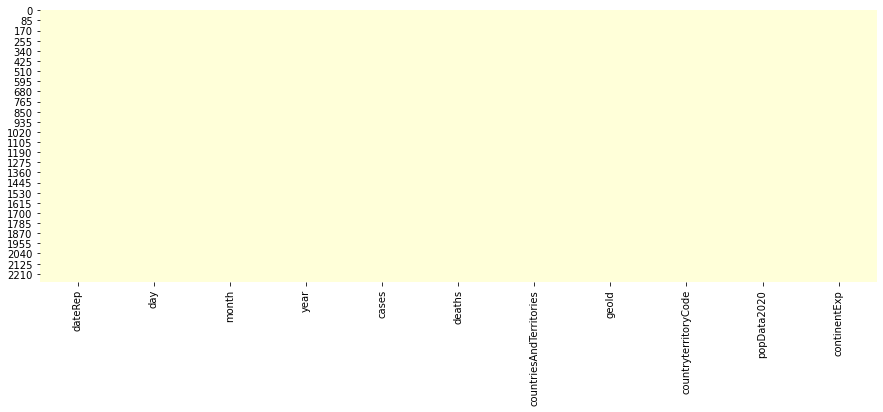

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df_daily_report.isnull(), cbar=False, vmin=0, vmax=0.7, cmap="YlGnBu", ax=ax)

In [14]:
for key,value in df_vaccinations.isnull().sum().iteritems():
    if value > 0:
        print(f' {key} - {value}')

 FirstDoseRefused - 16267
 NumberDosesReceived - 26071
 Denominator - 7668


<AxesSubplot:>

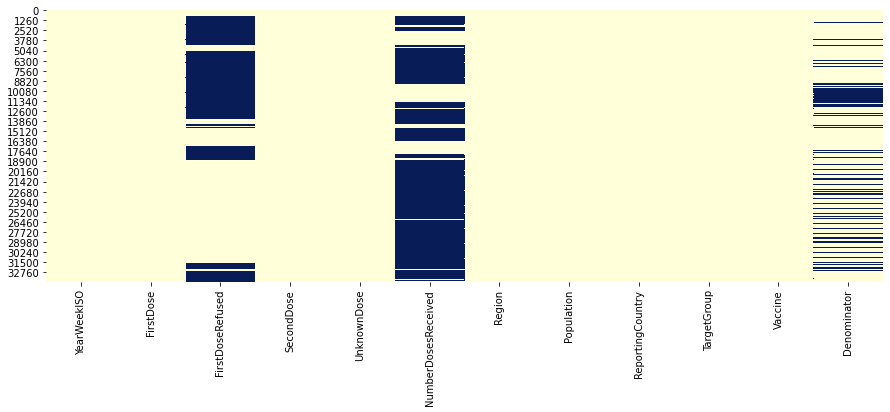

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(df_vaccinations.isnull(), cbar=False, vmin=0, vmax=0.7, cmap="YlGnBu", ax=ax)

Del dataset de vacunas tenemos datos nulos, como se puede ver en el heatmap en color azul tenemos la cantidad de datos nulos sobre el total del dataset, en total tenemos tres columnas con nulos: `FirstDoseRefused` :16267 , `NumberDosesReceived`:26071 y `Denominator`:7668.  Por otro lado del datset de casos diarios de COVID reportados no tenemos datos nulos.

A continuación exploraremos los datos que tenemos, mostraremos algunos histogramas de algunas de las variables en el dataset: 
- **Data on COVID-19 vaccination in the EU/EEA**

Text(0.5, 1.0, 'Número de vacunados por semanas')

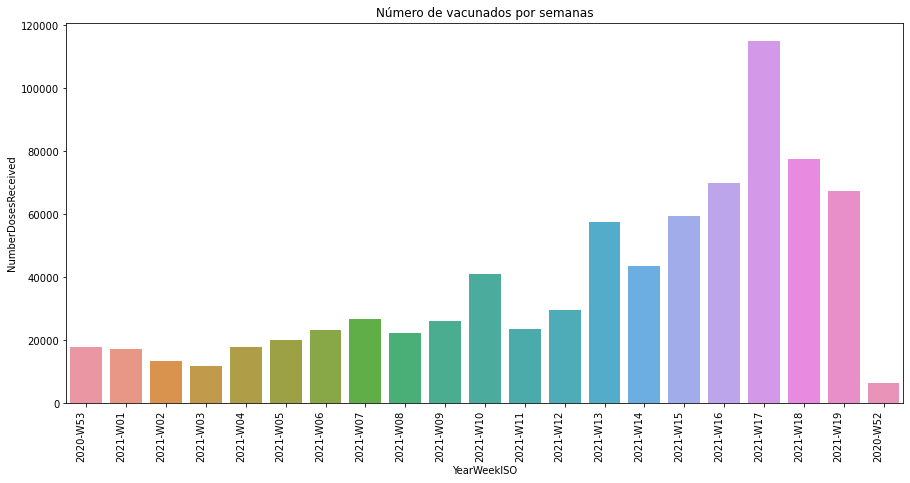

In [16]:
plt.figure(figsize=(15,7))
g = sns.barplot(x="YearWeekISO", y="NumberDosesReceived", ci=None ,data=df_vaccinations)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.title("Número de vacunados por semanas")

Se puede observar que en la semana número 17 del 2021 fue cuando se administró mas dosis.

Text(0.5, 1.0, 'Número de vacunados de la segunda dosis por país')

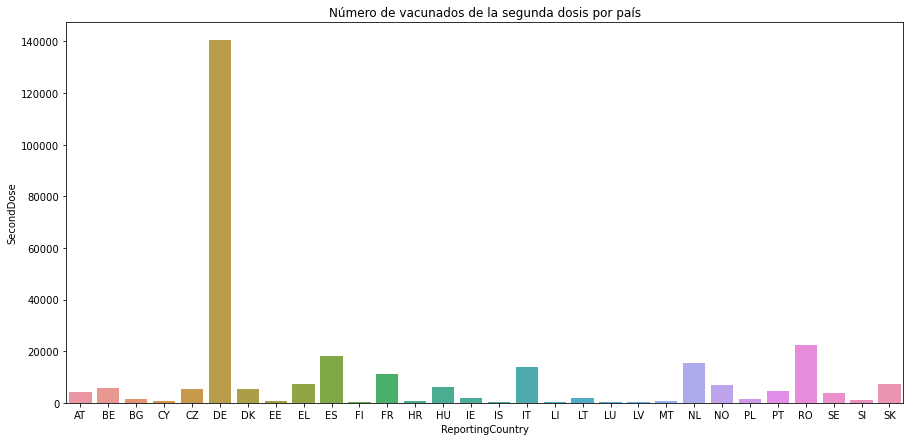

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x="ReportingCountry", y="SecondDose", ci=None, data=df_vaccinations)
plt.title("Número de vacunados de la segunda dosis por país")

Alemania es el país que se ha administrado más la segunda dosis.

Text(0.5, 1.0, 'Número de dosis recibidas por país')

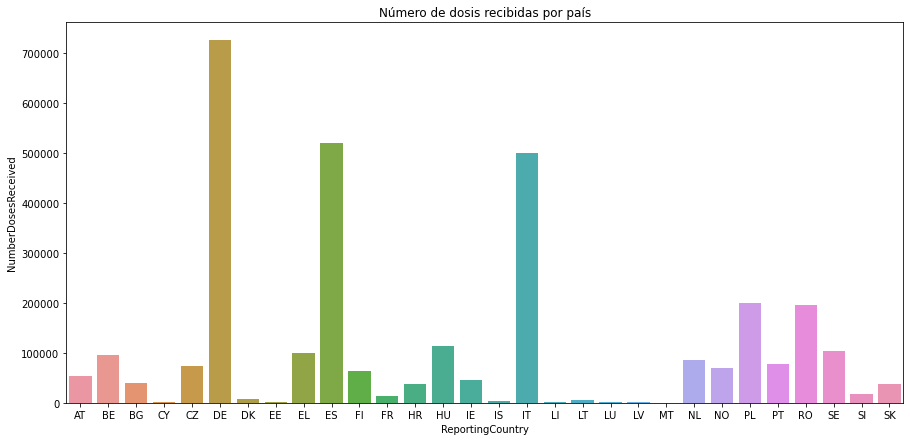

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x="ReportingCountry", y="NumberDosesReceived",ci=None, data=df_vaccinations)
plt.title("Número de dosis recibidas por país")

Alemania, Italia y España son los países que más vacunas han administrado.

In [19]:
df_vaccinations.Vaccine.unique()

array(['MOD', 'COM', 'JANSS', 'AZ', 'UNK', 'SPU', 'BECNBG'], dtype=object)

Text(0.5, 1.0, 'Número de dosis recibidas por tipo de vacunas')

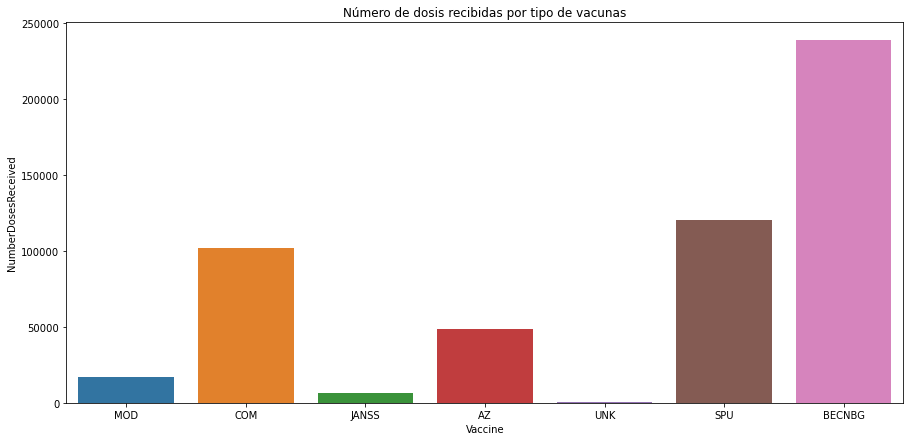

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x="Vaccine", y="NumberDosesReceived", ci=None, data=df_vaccinations)
plt.title("Número de dosis recibidas por tipo de vacunas")

Las vacunas más administradas en Europa son:
- CN = BBIBV-CorV –CNBG
- SPU = Sputnik V -Gamaleya 
- COM = Comirnaty –Pfizer/BioNTech

Text(0.5, 1.0, 'Número de dosis recibidas por rango de edad')

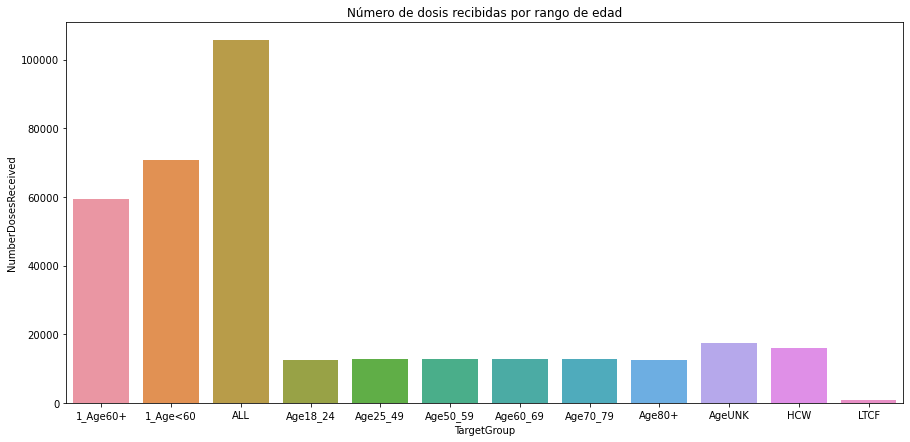

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(x="TargetGroup", y="NumberDosesReceived", ci=None, data=df_vaccinations)
plt.title("Número de dosis recibidas por rango de edad")

El rango de edad que más dosis de vacunas ha recivido es 1_age<60 y 1_Age60+
- (1_Age<60 = below 60 years of age1_Age60+ = 60 years and over)

- **Data on the daily number of new reported COVID-19 cases and deaths by EU/EEA country**

In [22]:
print(df_daily_report.continentExp.unique())
print(df_daily_report.year.unique())

['Europe']
[2021]


Los datos solo representan Europa y en el año 2021

Text(0.5, 1.0, 'Casos de COVID reportados por país')

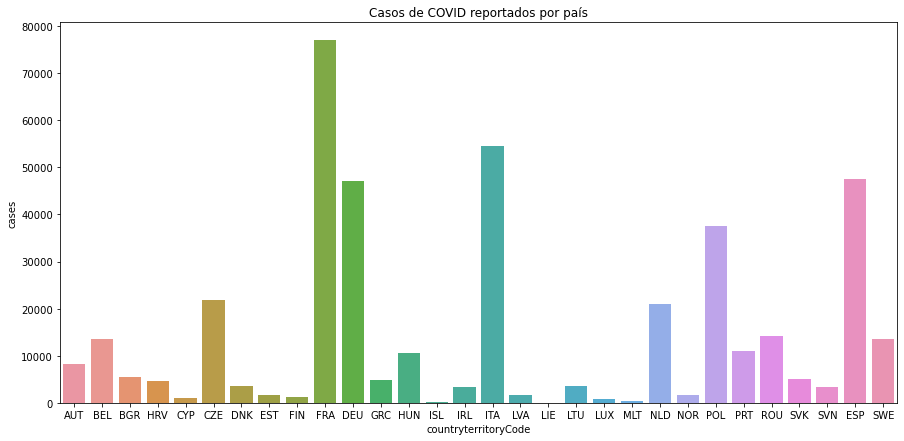

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(x="countryterritoryCode", y="cases", ci=None, data=df_daily_report)
plt.title("Casos de COVID reportados por país")

Los países con más casos reportados son Francia, Italia, Alemania y España.

Text(0.5, 1.0, 'Muertes de COVID reportados por país')

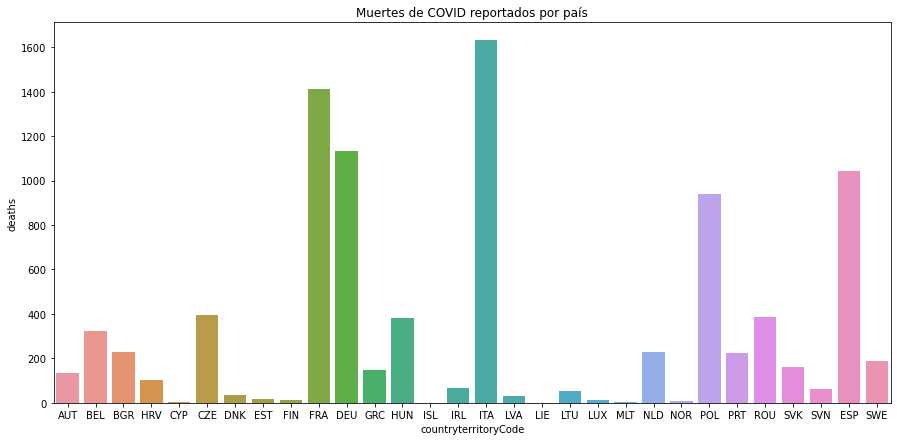

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(x="countryterritoryCode", y="deaths", ci=None, data=df_daily_report)
plt.title("Muertes de COVID reportados por país")

Los países con más muertes reportadas por COVID son:
- Italia
- Francia
- Alemania
- España
- Polonia

Text(0.5, 1.0, 'Casos de COVID reportados por mes')

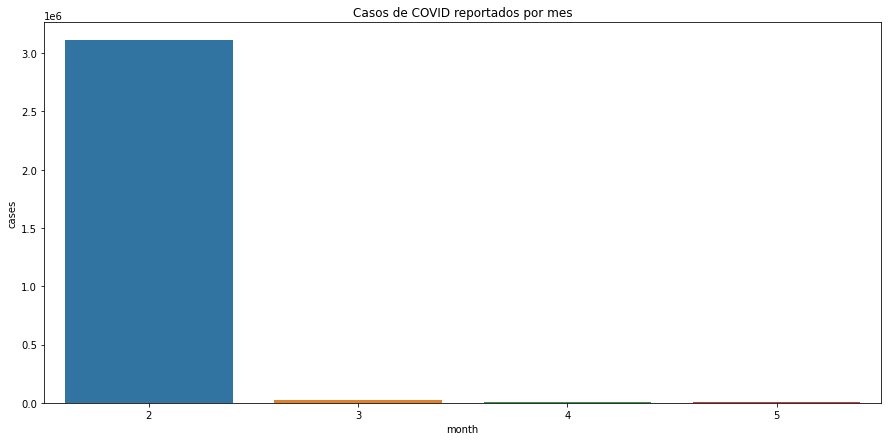

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(x="month", y="cases", ci=None, data=df_daily_report)
plt.title("Casos de COVID reportados por mes")

Text(0.5, 1.0, 'Muertes de COVID reportados por mes')

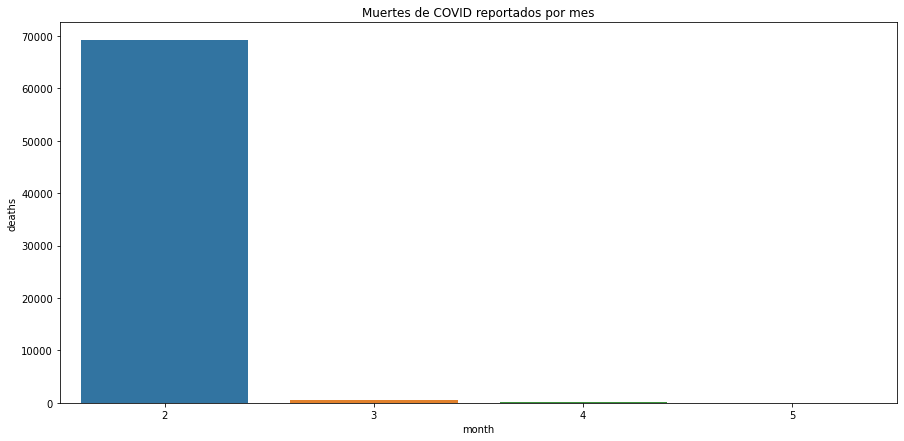

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(x="month", y="deaths", ci=None, data=df_daily_report)
plt.title("Muertes de COVID reportados por mes")

En el mes de febrero se ha reportados más casos y más muertes por COVID.

<div class="flourish-embed" data-src="story/861606"><script src="https://public.flourish.studio/resources/embed.js"></script></div>